In [1]:
import pandas as pd

data_ege = pd.read_csv('./ege_res.csv')
data_ege.head()

C:\Users\Kege\AppData\Local\Temp\ipykernel_18468\499653261.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Unnamed: 0,Возраст,Количество_часов_подготовки,Средний_балл_по_предметам,Количество_решенных_задач,Баллы_по_ЕГЭ_по_математике
0,0,17,48.5,3.792496,83.75,71.536911
1,1,15,25.5,3.658523,74.25,61.666490
2,2,17,49.5,3.207771,122.25,86.691294
3,3,17,45.5,2.674581,116.25,82.138047
4,4,15,46.5,3.081222,124.75,89.189361


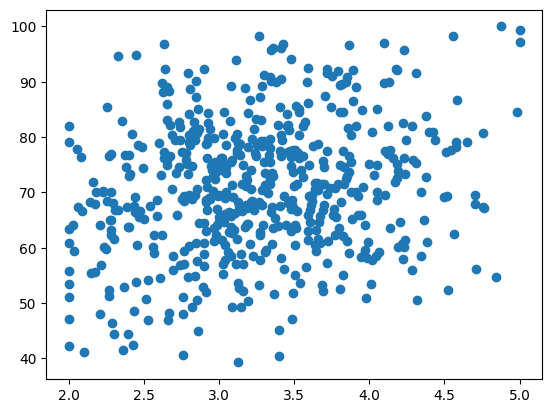

In [2]:
import matplotlib.pyplot as plt
plt.scatter(data_ege['Средний_балл_по_предметам'], data_ege['Баллы_по_ЕГЭ_по_математике'])
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

X_data_linear = data_ege[["Возраст", "Количество_решенных_задач", "Количество_часов_подготовки", "Средний_балл_по_предметам"]]
Y_data_linear = data_ege['Баллы_по_ЕГЭ_по_математике']
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_data_linear, Y_data_linear, test_size = 0.2, random_state = 42)

model_linear = LinearRegression()
model_linear.fit(X_train_linear, y_train_linear)

Y_pred_linear = model_linear.predict(X_test_linear)
mean_abs = mean_absolute_error(y_pred=Y_pred_linear, y_true=y_test_linear)
mean_sqr = mean_squared_error(y_pred=Y_pred_linear, y_true=y_test_linear)
print(mean_abs)
print(mean_sqr)


3.9524206871839462
25.8875094396799


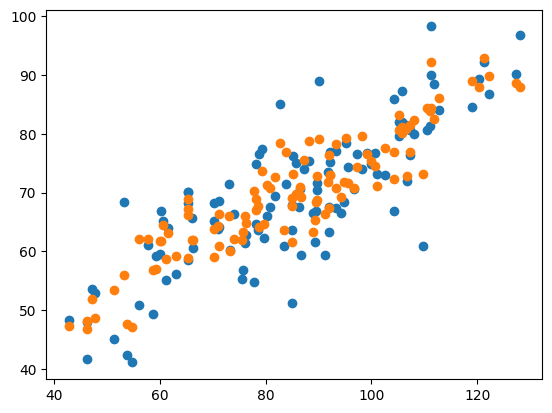

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X_test_linear['Количество_решенных_задач'], y_test_linear)
plt.scatter(X_test_linear['Количество_решенных_задач'], Y_pred_linear)
plt.show()

In [5]:
ball_EGE = model_linear.predict([[17,100,28,4.5]])
print(ball_EGE)

[79.54280325]


c:\Users\Kege\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error

X_three = data_ege[["Возраст", "Количество_решенных_задач", "Количество_часов_подготовки", "Средний_балл_по_предметам"]]
Y_three = data_ege['Баллы_по_ЕГЭ_по_математике']

x_tr, x_ts, y_tr, y_ts = train_test_split(X_three, Y_three, test_size = 0.2, random_state = 42)
model_three = DecisionTreeRegressor(max_depth = 4)
model_three.fit(x_tr, y_tr)
ege_pred = model_three.predict(x_ts)

mean_abs = mean_absolute_error(y_pred=ege_pred, y_true=y_ts)
mean_sqr = mean_squared_error(y_pred=ege_pred, y_true=y_ts)
print(mean_abs)
print(mean_sqr)

5.141040327183214
40.675831805354505


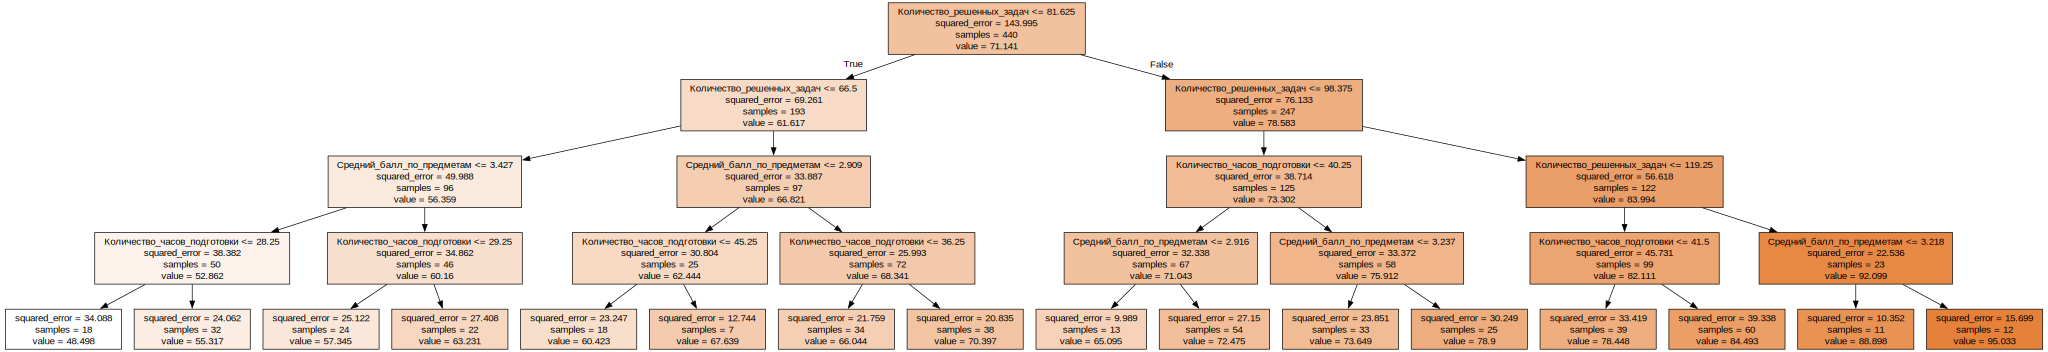

In [7]:
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

name = ['Возраст', 'Количество_решенных_задач', 'Количество_часов_подготовки', 'Средний_балл_по_предметам']
graph = Source(export_graphviz(model_three, out_file=None, feature_names=name, filled=True))
display(SVG(graph.pipe(format='svg')))